In [62]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

import warnings
import seaborn as sns 
from itertools import cycle
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
warnings.filterwarnings("ignore")
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [63]:
import numpy as np
def smape(a,f):
    return 1/len(a)*np.sum(2 * np.abs(f - a) / (np.abs(a)+ np.abs(f))*100)

In [78]:
dataxls = pd.ExcelFile("/Users/tharismac/Downloads/46Items_xlsx/I43.xlsx")

# Now you can list all sheets in the file
dataxls.sheet_names


['Sheet1']

In [79]:
data = pd.read_excel(dataxls,header=0)
data

,Week,I
0,"January 10, 2021",3101.52
1,"January 17, 2021",3867.56
2,"January 24, 2021",3854.58
3,"January 31, 2021",2815.69
4,"February 7, 2021",3549.96
...,...,...
85,"August 28, 2022",2548.02
86,"September 4, 2022",1979.58
87,"September 11, 2022",1900.62
88,"September 18, 2022",2029.46


In [80]:
train_data = data.iloc[:75]
test_data = data.iloc[75:]

In [81]:
test_data

,Week,I
75,"June 19, 2022",2822.08
76,"June 26, 2022",3053.58
77,"July 3, 2022",2957.80
78,"July 10, 2022",3569.93
79,"July 17, 2022",4109.08
80,"July 24, 2022",3753.72
81,"July 31, 2022",3328.24
82,"August 7, 2022",2851.64
83,"August 14, 2022",3214.38
84,"August 21, 2022",2294.94


In [82]:
span = 12
alpha = 2/(span+1)
simpleExpSmooth_model = SimpleExpSmoothing(train_data['I']).fit(smoothing_level=alpha,optimized=True)
doubleExpSmooth_model = ExponentialSmoothing(train_data['I'],trend='additive',seasonal_periods=6).fit()
tripleExpSmooth_model = ExponentialSmoothing(train_data['I'],trend='additive',seasonal='additive',seasonal_periods=4).fit()

In [83]:
predictions_simpleExpSmooth_model = simpleExpSmooth_model.forecast(15)
predictions_doubleExpSmooth_model = doubleExpSmooth_model.forecast(15)
predictions_tripleExpSmooth_model = tripleExpSmooth_model.forecast(15)

In [84]:
print('Simple Exponential Smoothing sMAPE:'  ," = ", smape(test_data["I"],predictions_simpleExpSmooth_model))
print('Double Exponential Smoothing sMAPE:' ," = ", smape(test_data["I"],predictions_doubleExpSmooth_model))
print('Triple Exponential Smoothing sMAPE:'," = ", smape(test_data["I"],predictions_tripleExpSmooth_model))

Simple Exponential Smoothing sMAPE:  =  28.92043233348711
Double Exponential Smoothing sMAPE:  =  34.94283347682135
Triple Exponential Smoothing sMAPE:  =  31.72458652456878


<AxesSubplot:>

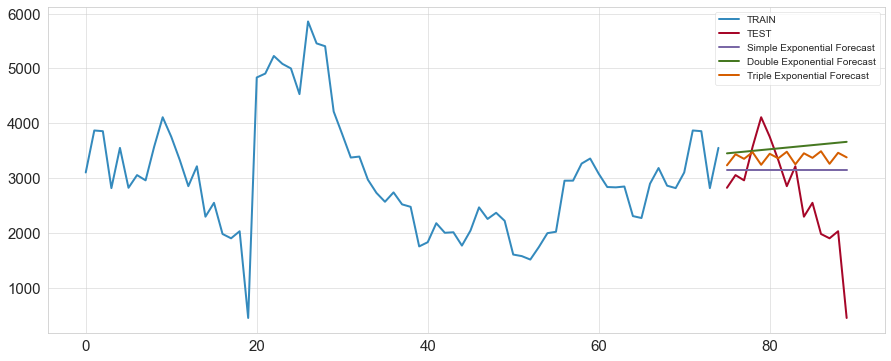

In [85]:
train_data['I'].plot(legend=True,label='TRAIN')
test_data['I'].plot(legend=True,label='TEST',figsize=(15,6))
predictions_simpleExpSmooth_model.plot(legend=True,label='Simple Exponential Forecast')
predictions_doubleExpSmooth_model.plot(legend=True,label='Double Exponential Forecast')
predictions_tripleExpSmooth_model.plot(legend=True,label='Triple Exponential Forecast')

In [86]:
test_data

,Week,I
75,"June 19, 2022",2822.08
76,"June 26, 2022",3053.58
77,"July 3, 2022",2957.80
78,"July 10, 2022",3569.93
79,"July 17, 2022",4109.08
80,"July 24, 2022",3753.72
81,"July 31, 2022",3328.24
82,"August 7, 2022",2851.64
83,"August 14, 2022",3214.38
84,"August 21, 2022",2294.94


In [87]:
predictions_tripleExpSmooth_model

75    3232.356955
76    3433.533052
77    3350.387241
78    3470.597248
79    3241.378725
80    3442.554822
81    3359.409011
82    3479.619018
83    3250.400496
84    3451.576593
85    3368.430782
86    3488.640788
87    3259.422266
88    3460.598363
89    3377.452552
dtype: float64

In [88]:
#print('Simple Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data,predictions_simpleExpSmooth_model))))
#print('Double Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data,predictions_doubleExpSmooth_model))))
#print('Triple Exponential Smoothing RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(test_data,predictions_tripleExpSmooth_model))))

In [89]:
print('Simple Exponential Smoothing sMAPE:'  ," = ", smape(test_data["I"],predictions_simpleExpSmooth_model))
print('Double Exponential Smoothing sMAPE:' ," = ", smape(test_data["I"],predictions_doubleExpSmooth_model))
print('Triple Exponential Smoothing sMAPE:'," = ", smape(test_data["I"],predictions_tripleExpSmooth_model))

Simple Exponential Smoothing sMAPE:  =  28.92043233348711
Double Exponential Smoothing sMAPE:  =  34.94283347682135
Triple Exponential Smoothing sMAPE:  =  31.72458652456878


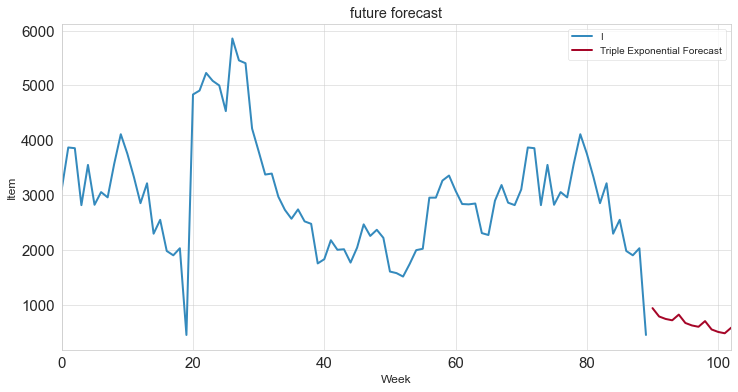

In [90]:
model = ExponentialSmoothing(data['I'],trend='additive',seasonal='additive',seasonal_periods=4)
results = model.fit()
fcast = results.predict(len(data),len(data)+12).rename('Triple Exponential Forecast')

# Plot predictions against known values
title = 'future forecast'
ylabel='Item'
xlabel='Week'

ax = data['I'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [91]:
fcast

90     937.089401
91     784.840211
92     739.708583
93     715.211150
94     818.691083
95     666.441893
96     621.310265
97     596.812832
98     700.292765
99     548.043575
100    502.911947
101    478.414514
102    581.894447
Name: Triple Exponential Forecast, dtype: float64

In [92]:
fcast.to_excel("/Users/tharismac/Desktop/Forecast Result 13 Weeks.xlsx")